# Supervised Learning and K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry We will load the data, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os

##  Load the data and examine it
We will not be some features like state, area code, and phone number. They will not affect the parameters

All data is important, but for this example we will not be using some features that might otherwise be important
for other researches. Knowing which features are important will affect efficiency on the hidden layers

In [2]:
data = pd.read_csv('c:/Users/jguim/MachineLearningResources/Orange_Telecom_Churn_Data.csv')
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)
data.head(10).T    #For the amount of features, printing vertically gives us the full picture

,0,1,2,3,4,5,6,7,8,9
account_length,128,107,137,84,75,118,121,147,117,141
intl_plan,no,no,no,yes,yes,yes,no,yes,no,yes
voice_mail_plan,yes,yes,no,no,no,no,yes,no,no,yes
number_vmail_messages,25,26,0,0,0,0,24,0,0,37
total_day_minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6
total_day_calls,110,123,114,71,113,98,88,79,97,84
total_day_charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96
total_eve_minutes,197.4,195.5,121.2,61.9,148.3,220.6,348.5,103.1,351.6,222
total_eve_calls,99,103,110,88,122,101,108,94,80,111
total_eve_charge,16.78,16.62,10.3,5.26,12.61,18.75,29.62,8.76,29.89,18.87


## Feature Engineering

Before we continue, we must standarize the data for easier programming. 
Some features will need to be numerically encoded since categorical data will not work for KNN
We will also scale the data for KNN to work properly


In [3]:
warnings.filterwarnings('ignore', module='sklearn')
lb = LabelBinarizer() #numerically encode method
msc = MinMaxScaler() #Scale the data method

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])
    
data = pd.DataFrame(msc.fit_transform(data), columns=data.columns)
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
account_length,0.524793,0.438017,0.561983,0.342975,0.305785,0.483471,0.495868,0.603306,0.479339,0.578512
intl_plan,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
voice_mail_plan,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
number_vmail_messages,0.480769,0.500000,0.000000,0.000000,0.000000,0.000000,0.461538,0.000000,0.000000,0.711538
total_day_minutes,0.754196,0.459744,0.692461,0.851778,0.474253,0.635562,0.620768,0.446657,0.524893,0.735704
total_day_calls,0.666667,0.745455,0.690909,0.430303,0.684848,0.593939,0.533333,0.478788,0.587879,0.509091
total_day_charge,0.754183,0.459672,0.692436,0.851740,0.474230,0.635542,0.620649,0.446620,0.524933,0.735609
total_eve_minutes,0.542755,0.537531,0.333242,0.170195,0.407754,0.606544,0.958207,0.283475,0.966731,0.610393
total_eve_calls,0.582353,0.605882,0.647059,0.517647,0.717647,0.594118,0.635294,0.552941,0.470588,0.652941
total_eve_charge,0.542866,0.537690,0.333225,0.170171,0.407959,0.606600,0.958266,0.283403,0.967001,0.610482



## KNN

We must first separate the table from the "churned" column
Split the data in training and testing
Then we will apply a KNN model of 3 neightbours. 

In [4]:
X_data = data.copy()
y_data = X_data.pop('churned')
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20,random_state=77)  
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4000
1000
4000
1000


In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

## Prediction and Accuracy score

In [6]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])
print(accuracy(y_test, y_pred))

0.903


## KNN testing with other parameters

In [7]:
knn1 = KNeighborsClassifier(n_neighbors=3,weights='distance', p=1) 
knn1.fit(X_train, y_train)  # Building the model
y_pred1 = knn1.predict(X_test)

knn2 = KNeighborsClassifier(n_neighbors=3,weights='distance', p=2) 
knn2.fit(X_train, y_train)  # Building the model
y_pred2 = knn2.predict(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3,weights='uniform',  p=1) 
knn3.fit(X_train, y_train)  # Building the model
y_pred3 = knn3.predict(X_test)

knn4 = KNeighborsClassifier(n_neighbors=3,weights='uniform',  p=2) 
knn4.fit(X_train, y_train)  # Building the model
y_pred4 = knn4.predict(X_test)

In [8]:
print(accuracy(y_test, y_pred1))
print(accuracy(y_test, y_pred2))
print(accuracy(y_test, y_pred3))
print(accuracy(y_test, y_pred4))

0.904
0.903
0.904
0.903


## Evaluating KNN through a range of neighbors

We will create a for loop to repeat the same model structure. We will keep all parameters equal during the process. 
The range will consist of 1 to 20. 
Finally store the accuracy and present it in a table.

In [9]:
k_value = []
accurarr = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 1)
    knn.fit(X_train, y_train) # Building the model
    pred_i = knn.predict(X_test)
    acctest = accuracy(y_test, pred_i)
    accurarr.append(acctest)
    k_value.append(i)

Text(0, 0.5, 'Accuracy')

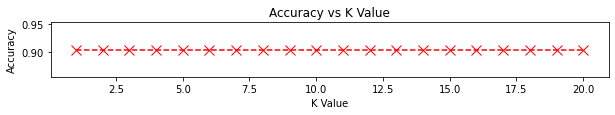

In [15]:
plt.figure(figsize=(10, 1))  
plt.plot(range(1, 21), accurarr, color='red', linestyle='dashed', marker='x', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')